### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
     - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
     - conda install -c anaconda pillow
     - pip install pillow
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우져를 화면에 띄우지 않고 RAM영역에만 띄어서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용

In [2]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [1]:
!mkdir datas

In [3]:
# 혹시 영상이 private 이나 삭제되었다면, 다른 공개된 영상 주소를 복사, 붙여넣기 해주세요.
url = "https://www.youtube.com/watch?v=cnXapYkboRQ&t=100s"
driver = webdriver.Chrome()
driver.get(url)

In [4]:
# 영상 가운데 큰 재생버튼을 눌러주는 코드 입니다.
try:
    driver.find_element_by_css_selector(".ytp-large-play-button.ytp-button").click()
except:
    pass # 만약 재생버튼이 없다면 무시합니다.

In [5]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

In [6]:
!ls datas

screenshot.png


(1295, 843)


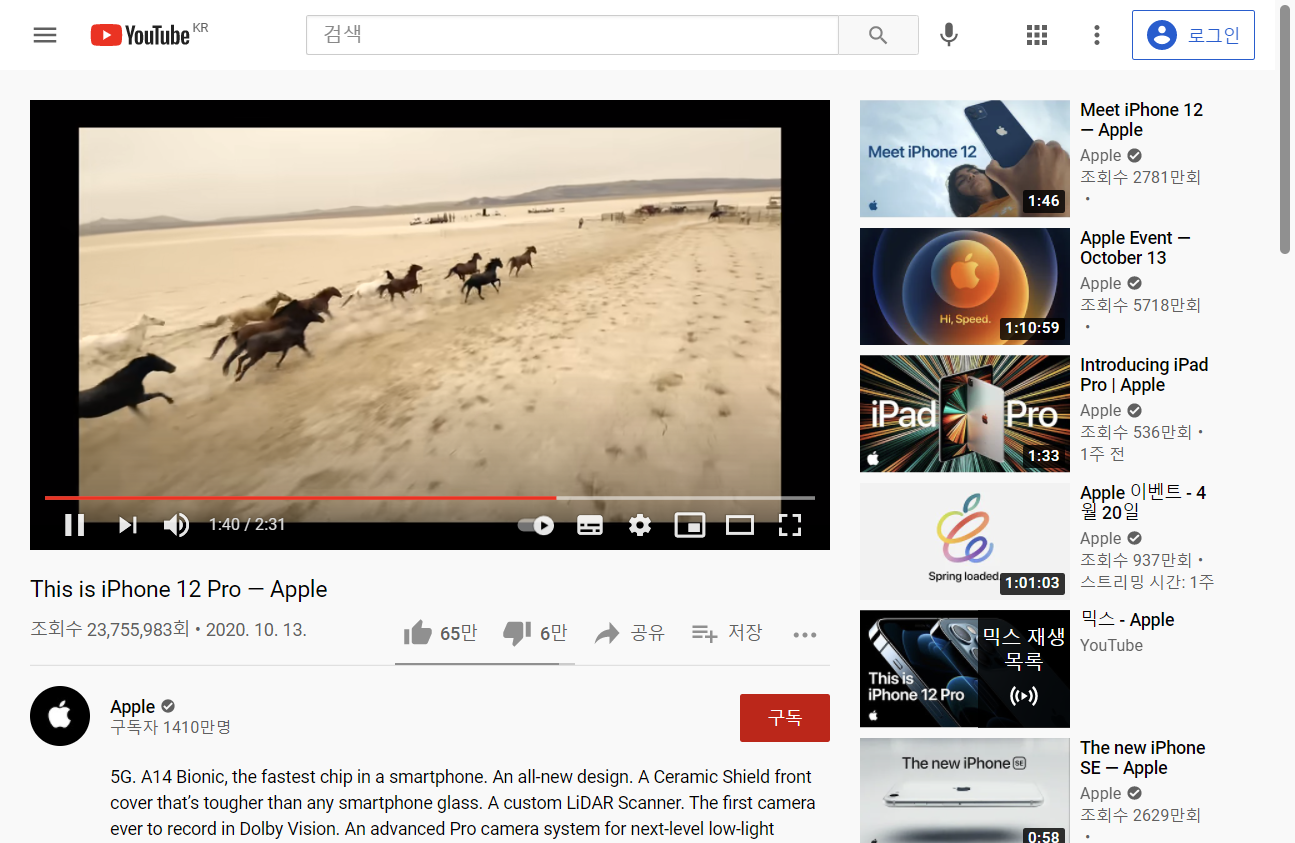

In [7]:
pil_img = pil.open("datas/screenshot.png")
print(pil_img.size)
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [8]:
driver = webdriver.Chrome()
driver.get(url)

In [9]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 360, 'width': 640}


In [10]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰 줘야 합니다.
left = location["x"]
top = location["y"]
right = left + size["width"]
bottom = top + size["height"]
area = (left, top, right, bottom)
area

(24, 80, 664, 440)

#### 3. 이미지를 pillow로 잘라주기

In [12]:
pil_element_img = pil_img.crop(area)
pil_element_img.size

(640, 360)

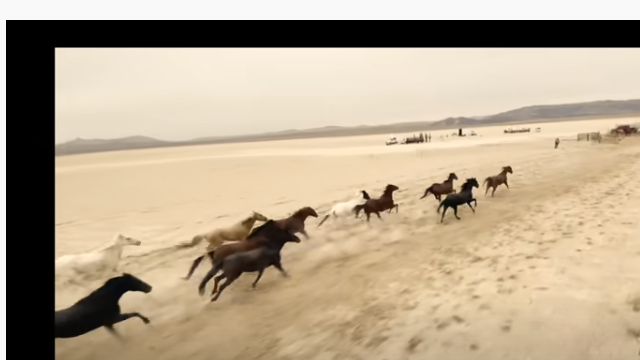

In [13]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [14]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [16]:
!ls datas

screenshot.png
screenshot_element.png


#### 썸네일 만들기 
- 원본 이미지를 다양한 사이즈로 축소하는 방법

In [17]:
pil_element_img.size

(640, 360)

(284, 160)


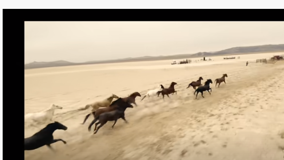

In [18]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

#### fake useragent

In [19]:
from fake_useragent import UserAgent

In [20]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36


In [21]:
UserAgent().chrome

'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'

In [22]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36


#### Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- 크롬 버전 60 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용

In [23]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

패스트캠퍼스


#### 영상 파일 다운로드
- www. -> ss 로 변경하면 다운 로드 받을수 있는 사이트에 접속

In [26]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [27]:
url = "https://www.youtube.com/watch?v=cnXapYkboRQ"

아래 링크 주소는 '낮은 품질로' 를 클릭하면 다운로드 버튼을 확인할 수 있습니다.

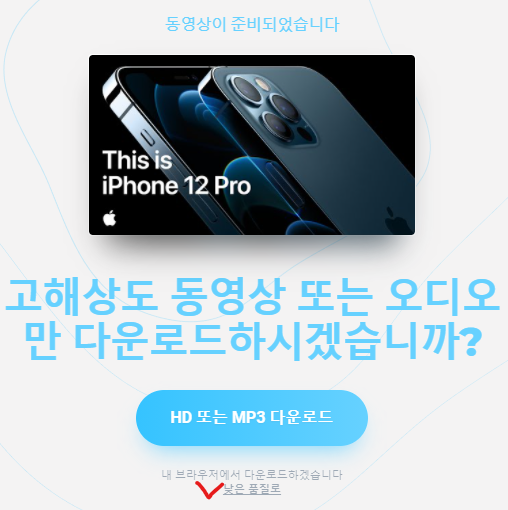


In [28]:
link = "https://r2---sn-xguxaxjvh-n8ml.googlevideo.com/videoplayback?expire=1619696986&ei=-kiKYOXACpOz7ASxyp_gAw&ip=188.234.248.18&id=o-AGgp9GfaXJ5E5C5rj81R6SbSEAE3aEcoy4H1a2_1XH88&itag=22&source=youtube&requiressl=yes&mh=8T&mm=31%2C29&mn=sn-xguxaxjvh-n8ml%2Csn-n8v7znlr&ms=au%2Crdu&mv=m&mvi=2&pcm2cms=yes&pl=24&initcwndbps=2095000&vprv=1&mime=video%2Fmp4&ns=tGhp3ZbapbF5q_v1Zcd22BMF&cnr=14&ratebypass=yes&dur=151.928&lmt=1606635385812605&mt=1619675083&fvip=10&fexp=24001373%2C24007246&c=WEB&txp=5432432&n=mGonP6czVyy2nQO&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRQIhAJOt2iqxBjyQvDc9BGQpQHgMdhWfsyV492ALTSN6qoYnAiB_t9O3EepKHaUAyvFjuoBSnLcEd1IvR5a7J43i0XvkhQ%3D%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpcm2cms%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIgQ0keq--5q_i8Sv34kUc42xsUaR9zB_ETuq_1APxYeJ8CIQDO-_tKlJoxTi5ymmI68FvdZ7dBRyGpLKGtQzQzFpVHEw%3D%3D&title=This%20is%20iPhone%2012%20Pro%20%E2%80%94%20Apple"

In [29]:
title = "Apple_September_Event_2016.mp4"
size = download(title, link)
print("{} Mb".format(round(size/1024/1024,2)))

13.51 Mb
